In [25]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

# import MNIST data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [38]:
from keras import regularizers

# adding a sparsity
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-9))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# comiple
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.3417 - val_loss: 0.2670
Epoch 2/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2637 - val_loss: 0.2574
Epoch 3/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2455 - val_loss: 0.2348
Epoch 4/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2316 - val_loss: 0.2252
Epoch 5/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2191 - val_loss: 0.2106
Epoch 6/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2061 - val_loss: 0.1986
Epoch 7/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1943 - val_loss: 0.1866
Epoch 8/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1841 - val_loss: 0.1797
Epoch 9/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1778 - val_loss: 0.1

60000/60000 [==============================] - 2s 41us/step - loss: 0.1120 - val_loss: 0.1112
Epoch 78/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1118 - val_loss: 0.1109
Epoch 79/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1116 - val_loss: 0.1095
Epoch 80/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.1114 - val_loss: 0.1099
Epoch 81/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1113 - val_loss: 0.1098
Epoch 82/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1112 - val_loss: 0.1100
Epoch 83/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1110 - val_loss: 0.1103
Epoch 84/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.1109 - val_loss: 0.1091
Epoch 85/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.1106 - val_loss: 0.1101
Epoch 86/100
60000/60000 [========================

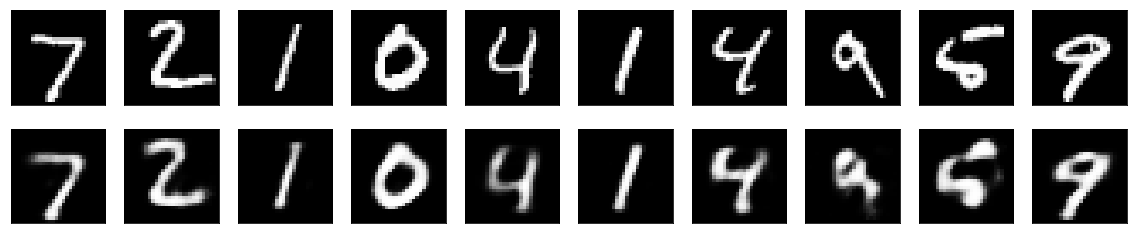

In [39]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()